<IPython.core.display.Javascript object>


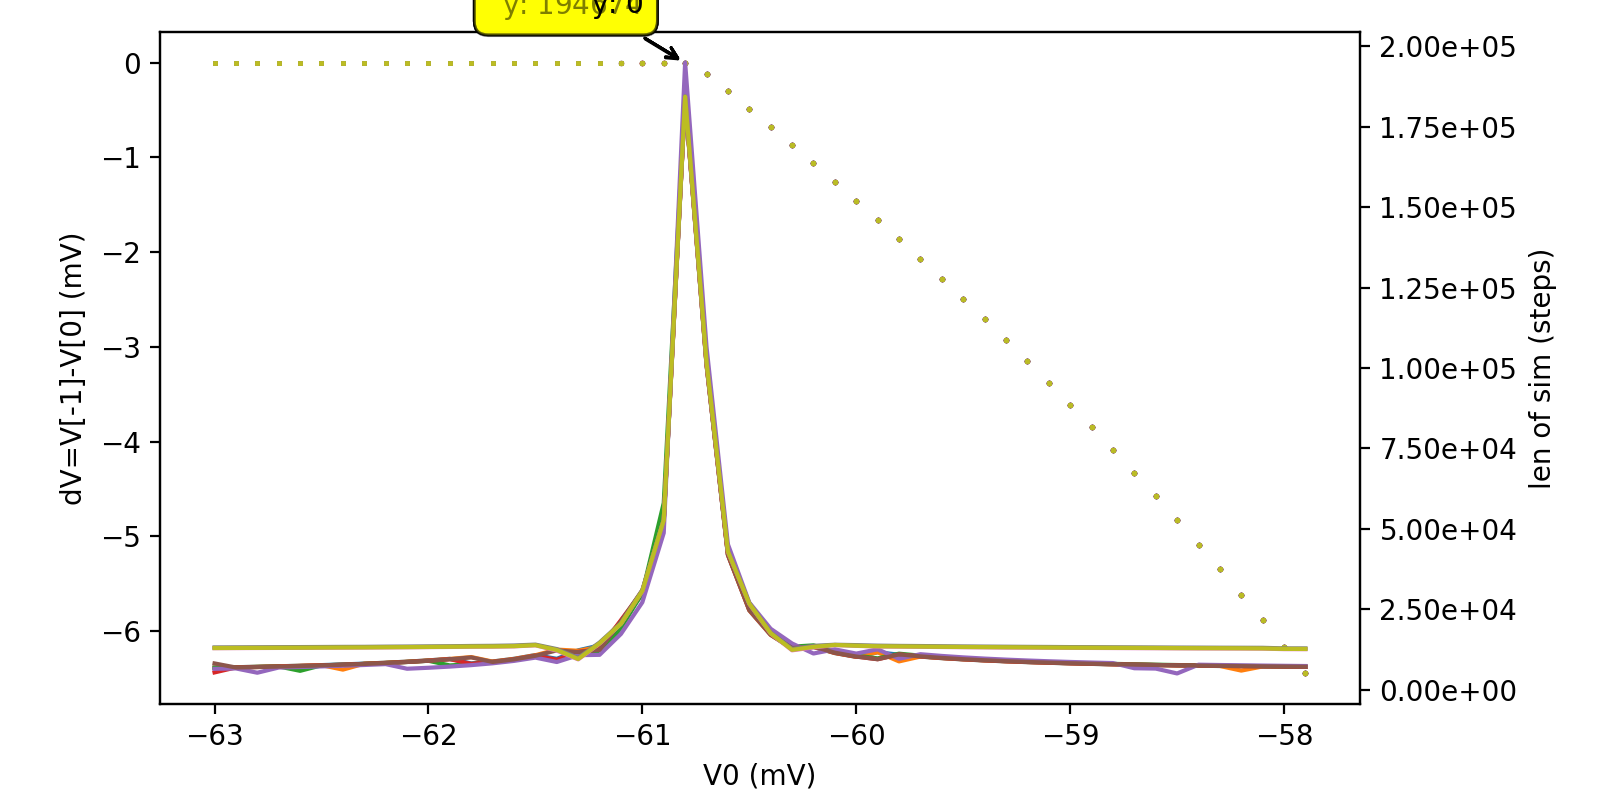

Text(0.5,0,'V0 (mV)')

In [6]:
%matplotlib notebook
from mpldatacursor import datacursor
from matplotlib.ticker import FormatStrFormatter
from matplotlib import pyplot
import numpy as np
directory = 'resting_potential_shift'
#datafn = 'dV-nonNormVrest'
#datafn = 'dVonly-nonNormVrest'
datafn = 'dVonly_B'
n = 9
fig = pyplot.figure('dV',figsize=((8,4)))

ax1 = fig.add_subplot(1,1,1)
pyplot.subplots_adjust(wspace=0.8, hspace=0.8, left=0.1, bottom=0.12, right=0.85, top=0.96)
ax2 = pyplot.twinx(ax1)
#vRange = np.arange(-61.40,-60.95,0.005)
prop_cycle = pyplot.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
for i in xrange(n):
    data = np.load(directory+'/'+datafn+str(i)+'.npz')
    dV = data['dV']
    length = data['length']
    fired = data['fired']
    vRange = data['vRange']
    #V = data['V']
    nonFiringDv = dV[fired==0]
    ax1.plot(vRange[:nonFiringDv.size],nonFiringDv,'s',ms=1.0,c=colors[i])
    dots = ax1.plot(vRange[nonFiringDv.size:],dV[fired>0],'o',ms=1.0,c=colors[i])
    lines = ax2.plot(vRange,length,'-',c=colors[i])
    datacursor(lines)
    datacursor(dots)
    #pyplot.figure('V')
    #pyplot.plot(V[(x[i]-2):(x[i]+2),:].T)
ax1.set_ylabel('dV=V[-1]-V[0] (mV)')
ax2.yaxis.set_major_formatter(FormatStrFormatter('%1.2e'))
ax2.set_ylabel('len of sim (steps)')
ax1.set_xlabel('V0 (mV)')

#ax1.set_ylim((-1e-8,1e-9))
#ax2.set_ylim((5000,35000))

In [4]:
fign=datafn+'dVlen'
fmt='png'
pyplot.savefig(fign+'.'+fmt,fmt=fmt,dpi=900)